In [ ]:
# Importar llibreries: En aquesta cel·la, s'importen les llibreries necessàries per a l'anàlisi de dades, 
# com Pandas per a la manipulació de dades, NumPy per a càlculs numèrics, Matplotlib i Seaborn per a visualitzacions.
# Carregar el dataset: En aquesta cel·la, s'importa un conjunt de dades sobre la qualitat del vi des d'una URL utilitzant Pandas.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import skew

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df_wines = pd.read_csv(url, sep=';')
df_wines.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# Afegir valors nuls i files duplicades: Aquí s'introdueixen valors nuls en algunes files
# i una certa quantitat de files duplicades al conjunt de dades per a propòsits d'exemple.
# Anàlisi descriptiu: Es realitza un anàlisi descriptiu bàsic del conjunt de dades,
# incloent una descripció estadística i informació sobre les columnes i el tipus de dades.

In [14]:
print("Columnes del dataframe:", df_wines.columns)
print("Tipus de dades de les columnes:", df_wines.dtypes)
print("Descripció estadística del dataframe:")
print(df_wines.describe())
print("Informació del dataframe:")
print(df_wines.info())


Columnes del dataframe: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
Tipus de dades de les columnes: fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object
Descripció estadística del dataframe:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928  

In [ ]:
# Anàlisi de duplicats: Es detecten i eliminen les files duplicades del conjunt de dades.

In [15]:
duplicats = df_wines.duplicated()
print(f"Files duplicades: {duplicats.sum()}")
df_wines = df_wines.drop_duplicates()



Files duplicades: 240


In [ ]:
# Anàlisi de valors que manquen: Es detecten els valors nuls i es mostra el nombre total de valors nuls per columna.

In [16]:
print("Valors nuls per columna:")
print(df_wines.isnull().sum())
print(f"Total valors nuls: {df_wines.isnull().sum().sum()}")



Valors nuls per columna:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Total valors nuls: 0


In [ ]:
# Eliminació i substitució de valors nuls: Es decideix eliminar les files amb valors nuls
# i s'omplen els valors nuls restants amb la mitjana de cada columna.

In [17]:
df_wines = df_wines.dropna(how='all')

df_wines = df_wines.fillna(df_wines.mean())



In [ ]:
# Visualització de les dades - Distribució de la qualitat del vi:
# Es mostra un histogrames que representa la distribució de la qualitat del vi en el conjunt de dades.

C:\Users\Marc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


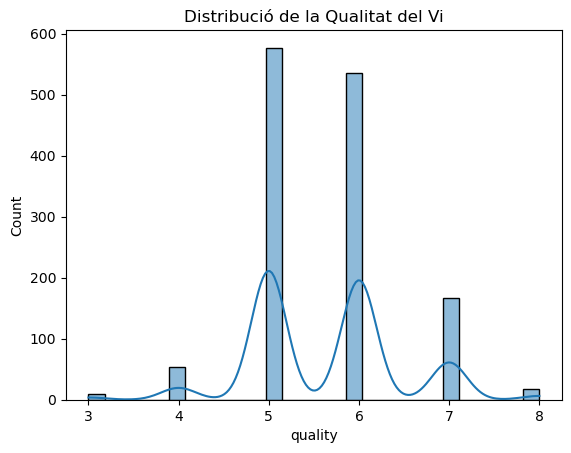

In [18]:
sns.histplot(df_wines['quality'], kde=True)
plt.title('Distribució de la Qualitat del Vi')
plt.show()



In [ ]:
# Visualització de les dades - Histogrames per a totes les columnes: 
# Es mostren histogrames per a totes les columnes del conjunt de dades per tenir una idea de la distribució de les variables.

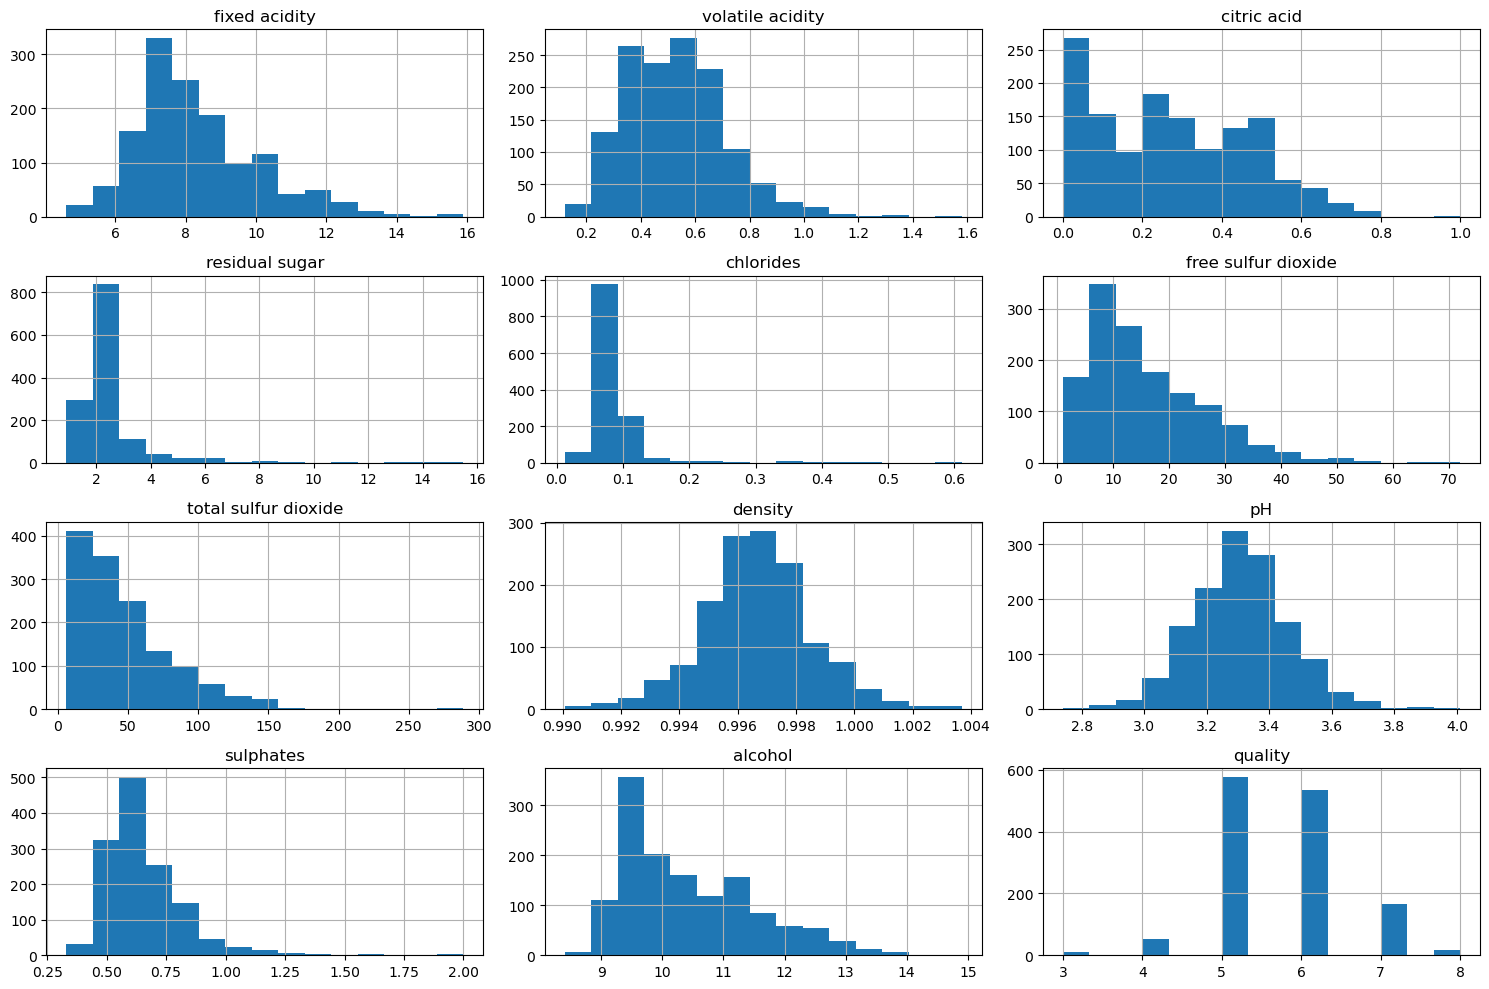

In [19]:
df_wines.hist(bins=15, figsize=(15, 10), layout=(4, 3))
plt.tight_layout()
plt.show()


In [ ]:
# Visualització de les dades - Distribució de densitat per a una variable:
# Es mostra la distribució de densitat de la variable 'alcohol' utilitzant un gràfic de densitat.

C:\Users\Marc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


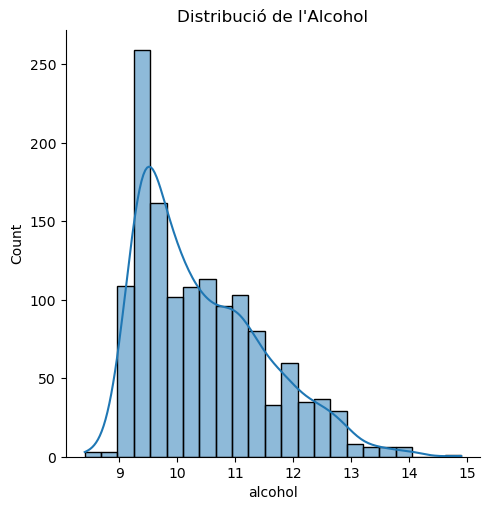

In [20]:
sns.displot(df_wines['alcohol'], kde=True)
plt.title('Distribució de l\'Alcohol')
plt.show()



In [ ]:
# Skewness de la distribució d'alcohol: Es calcula i es mostra la skewness de la distribució de la variable 'alcohol'.

In [21]:
print("Skewness de la distribució d'alcohol:", skew(df_wines['alcohol']))



Skewness de la distribució d'alcohol: 0.8588918260127338


In [ ]:
# Visualització 3D: Es crea una visualització en 3D que mostra la relació entre les variables 'alcohol', 'pH' i 'qualitat'.

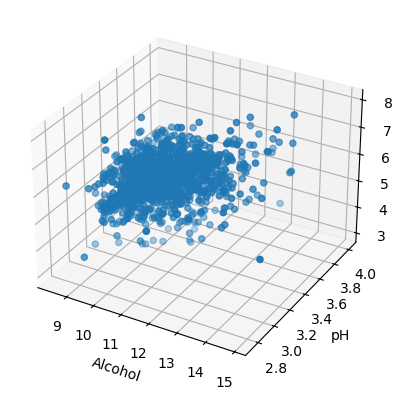

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_wines['alcohol'], df_wines['pH'], df_wines['quality'])
ax.set_xlabel('Alcohol')
ax.set_ylabel('pH')
ax.set_zlabel('Qualitat')
plt.show()



In [ ]:
# Skewness de totes les columnes: Es calcula i es mostra la skewness de totes les columnes del conjunt de dades. 
# Això proporciona informació sobre la asimetria de les distribucions de les variables.

In [23]:
print("Skewness de totes les columnes:")
print(df_wines.skew())


Skewness de totes les columnes:
fixed acidity           0.941041
volatile acidity        0.729279
citric acid             0.312726
residual sugar          4.548153
chlorides               5.502487
free sulfur dioxide     1.226579
total sulfur dioxide    1.540368
density                 0.044778
pH                      0.232032
sulphates               2.406505
alcohol                 0.859841
quality                 0.192407
dtype: float64
